In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pyecharts
import matplotlib as mpl


In [2]:
data = pd.read_csv('task1_1.csv', encoding='gb2312')

In [3]:
data = data.dropna()

In [4]:
data.head()

,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,20150101,201501,DW-1201090311,,生鲜,个,8.0,4.0,2.0,否
1,1,20,粮油,2014,酱菜类,201401,榨菜,20150101,201501,DW-2014010019,60g,一般商品,袋,6.0,3.0,0.5,否
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020011,150g,一般商品,袋,1.0,2.4,2.4,否
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,20150101,201501,DW-1503050035,500g,一般商品,袋,1.0,6.5,8.3,否
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020020,100g*8,一般商品,袋,1.0,11.9,11.9,否


In [5]:
data.isnull().any()

顾客编号    False
大类编码    False
大类名称    False
中类编码    False
中类名称    False
小类编码    False
小类名称    False
销售日期    False
销售月份    False
商品编码    False
规格型号    False
商品类型    False
单位      False
销售数量    False
销售金额    False
商品单价    False
是否促销    False
dtype: bool

In [302]:
data_dl = data['销售金额'].groupby(data['是否促销'])
sum_xx = data_dl.sum()
sum_xx = pd.DataFrame(sum_xx)

In [303]:
sum_xx['销售金额']

是否促销
否    345688.23
是    108524.02
Name: 销售金额, dtype: float64

Text(0.5, 1.0, '是否促销对销售额的影响')

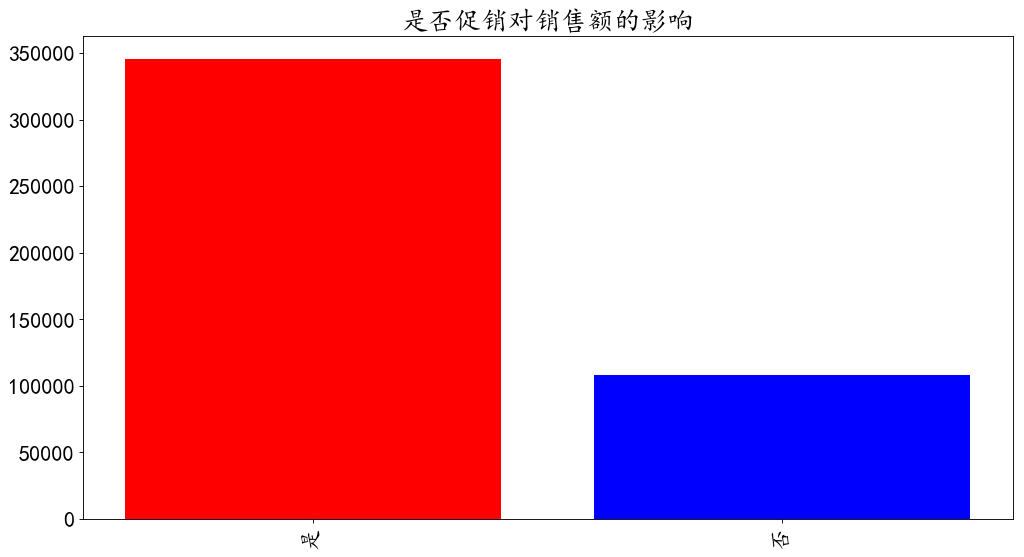

In [307]:
plt.rcParams['axes.unicode_minus'] = False 
plt.figure(figsize=(15,8),dpi=80)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.rcParams.update({"font.size":20})
plt.bar(['是','否'],sum_xx['销售金额'],color=['red','blue','yellow','green'])
plt.title('是否促销对销售额的影响')

In [306]:
type(sum_xx['销售金额'])

pandas.core.series.Series

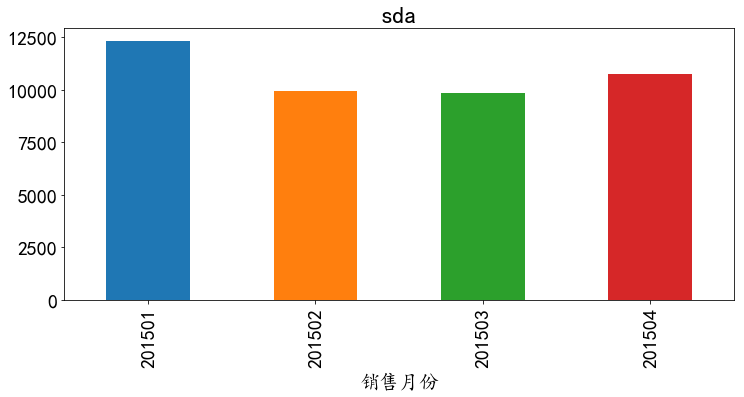

In [274]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.title('sda')
plt.rcParams.update({"font.size":20})
data_dl.size().plot(kind='bar', 
                      figsize=(12,5)
                                 )

In [7]:
num = len(data)

In [8]:
data_2 = data[['中类名称','销售金额','是否促销']]

In [9]:
data_2_cx = data_2.loc[data_2['是否促销'] == '是']
data_2_cx.head()

,中类名称,销售金额,是否促销
18,毯子,79.00,是
19,饼干,2.70,是
22,常温乳品,33.90,是
27,南北干货,8.28,是
34,袋装速食面组,10.90,是


In [10]:
grouped = data_2_cx['销售金额'].groupby(data_2_cx['中类名称'])

In [11]:
sum_cx = grouped.sum()

In [12]:
sum_cx = pd.DataFrame(sum_cx)
sum_cx.rename(columns={'销售金额':'促销时销售金额'},inplace=True)

In [13]:
sum_cx.head()

,促销时销售金额
中类名称,
一次性用品,70.90
乳饮料,673.50
五谷杂粮,2935.72
保养用品,77.30
保温容器,117.90


In [17]:
data_2_fcx = data_2.loc[data_2['是否促销'] == '否']
data_2_fcx.head()

,中类名称,销售金额,是否促销
0,蔬菜,4.0,否
1,酱菜类,3.0,否
2,冷藏乳品,2.4,否
3,冷藏料理,6.5,否
4,冷藏乳品,11.9,否


In [18]:
grouped_2 = data_2_fcx['销售金额'].groupby(data_2_fcx['中类名称'])

In [19]:
sum_fcx = grouped_2.sum()
sum_fcx = pd.DataFrame(sum_fcx)
sum_fcx.rename(columns={'销售金额':'未促销时销售金额'},inplace=True)
sum_fcx.head()

,未促销时销售金额
中类名称,
一次性用品,727.30
不锈钢餐具,37.00
个人卫生用品,47.20
中式熟菜,477.45
乳饮料,1972.40


In [20]:
df = sum_cx.join(sum_fcx)

In [21]:
df.to_csv("task1_3.csv", encoding='gbk')

# 蔬果

In [37]:
data_2_2_sg = data.loc[data['大类名称'] == '蔬果']

In [41]:
data_2_2_sg.head()

,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,20150101,201501,DW-1201090311,,生鲜,个,8.000,4.00,2.00,否
6,6,12,蔬果,1201,蔬菜,120104,花果,20150101,201501,DW-1201040022,散称,生鲜,千克,0.964,8.07,5.60,否
11,11,12,蔬果,1201,蔬菜,120104,花果,20150101,201501,DW-1201040016,散称,生鲜,千克,0.784,1.25,1.60,否
12,11,12,蔬果,1201,蔬菜,120104,花果,20150101,201501,DW-1201040035,散称,生鲜,千克,0.401,3.85,9.60,否
25,2,12,蔬果,1201,蔬菜,120104,花果,20150101,201501,DW-1201040010,散称,生鲜,千克,0.708,1.83,2.58,否


In [42]:
data_2_2_sg_sm = data_2_2_sg['销售金额'].sum()

In [43]:
data_2_2_sg_sm

81375.79000000001

# 日配

In [48]:
data_2_2_rp = data_2_2.loc[data_2_2['大类名称'] == '日配']
data_2_2_rp_sm = data_2_2_rp['销售金额'].sum()
data_2_2_rp_sm

NameError: name 'data_2_2' is not defined

# 洗化


In [132]:
data_2_2_xh = data_2_2.loc[data_2_2['大类名称'] == '洗化']
data_2_2_xh_sm = data_2_2_xh['销售金额'].sum()
data_2_2_xh_sm

38013.8

# 酒饮

In [133]:
data_2_2_jy = data_2_2.loc[data_2_2['大类名称'] == '酒饮']
data_2_2_jy_sm = data_2_2_jy['销售金额'].sum()
data_2_2_jy_sm

54790.9

# 休闲

In [134]:
data_2_2_xx = data_2_2.loc[data_2_2['大类名称'] == '休闲']
data_2_2_xx_sm = data_2_2_xx['销售金额'].sum()
data_2_2_xx_sm

74145.2

# 粮油

In [135]:
data_2_2_ly = data_2_2.loc[data_2_2['大类名称'] == '粮油']
data_2_2_ly_sm = data_2_2_ly['销售金额'].sum()
data_2_2_ly_sm

60931.95

# 家居

In [136]:
data_2_2_jj = data_2_2.loc[data_2_2['大类名称'] == '家居']
data_2_2_jj_sm = data_2_2_jj['销售金额'].sum()
data_2_2_jj_sm

6311.1

# 针织

In [138]:
data_2_2_zz = data_2_2.loc[data_2_2['大类名称'] == '针织']
data_2_2_zz_sm = data_2_2_zz['销售金额'].sum()
data_2_2_zz_sm

5765.9

# 熟食

In [139]:
data_2_2_ss = data_2_2.loc[data_2_2['大类名称'] == '熟食']
data_2_2_ss_sm = data_2_2_ss['销售金额'].sum()
data_2_2_ss_sm

5939.9400000000005

# 肉禽

In [140]:
data_2_2_rq = data_2_2.loc[data_2_2['大类名称'] == '肉禽']
data_2_2_rq_sm = data_2_2_ss['销售金额'].sum()
data_2_2_rq_sm

5939.9400000000005

# 冲调

In [155]:
data_2_2_ct = data_2_2.loc[data_2_2['大类名称'] == '冲调']
data_2_2_ct_sm = data_2_2_ct['销售金额'].sum()
data_2_2_ct_sm

13955.6

# 水产

In [156]:
data_2_2_sc = data_2_2.loc[data_2_2['大类名称'] == '水产']
data_2_2_sc_sm = data_2_2_sc['销售金额'].sum()
data_2_2_sc_sm

2891.0

# 文体

In [157]:
data_2_2_wt = data_2_2.loc[data_2_2['大类名称'] == '文体']
data_2_2_wt_sm = data_2_2_wt['销售金额'].sum()
data_2_2_wt_sm

1970.3

# 家电

In [158]:
data_2_2_jd = data_2_2.loc[data_2_2['大类名称'] == '家电']
data_2_2_jd_sm = data_2_2_sc['销售金额'].sum()
data_2_2_jd_sm

2891.0

# 烘焙

In [159]:
data_2_2_hb = data_2_2.loc[data_2_2['大类名称'] == '烘焙']
data_2_2_hb_sm = data_2_2_hb['销售金额'].sum()
data_2_2_hb_sm

110.89999999999999

# 总和

In [188]:
zh = [data_2_2_hb_sm, data_2_2_jd_sm, data_2_2_wt_sm,
      data_2_2_sc_sm, data_2_2_ct_sm, data_2_2_rq_sm,
      data_2_2_ss_sm, data_2_2_zz_sm, data_2_2_jj_sm,
      data_2_2_ly_sm, data_2_2_xx_sm, data_2_2_jy_sm,
      data_2_2_xh_sm, data_2_2_rp_sm, data_2_2_sg_sm]
zh

[110.89999999999999,
 2891.0,
 1970.3,
 2891.0,
 13955.6,
 5939.9400000000005,
 5939.9400000000005,
 5765.9,
 6311.1,
 60931.95,
 74145.2,
 54790.9,
 38013.8,
 81958.3,
 81375.79000000001]

In [183]:
type(zh)

list

# 月份

## 1月份 

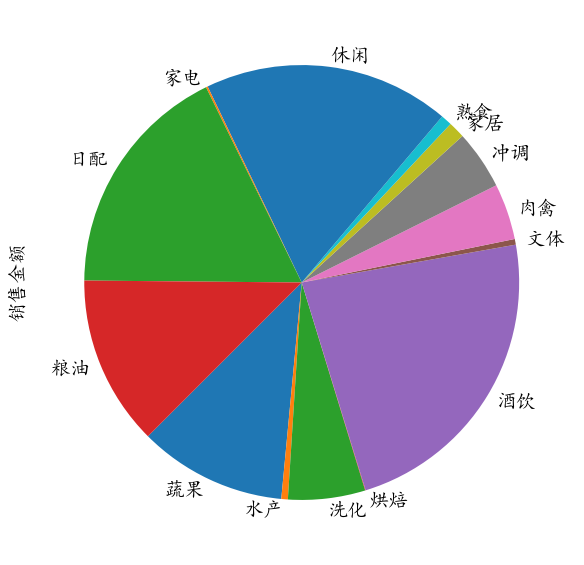

In [228]:
data_2_2_1 = data_2_2.loc[data_2_2['销售月份'] == 201502]
data_2_2_1 = data_2_2_1.drop(['销售月份'],axis=1)
data_01 = data_2_2_1['销售金额'].groupby(data_2_2_1['大类名称'])
data_01 = data_01.sum()
data_01 = data_01.take(sampler)
sampler= np.random.permutation(14)
plt.figure(figsize=(10,10))
data_01.plot.pie(labeldistance = 1.05,startangle=225)

# 2月份

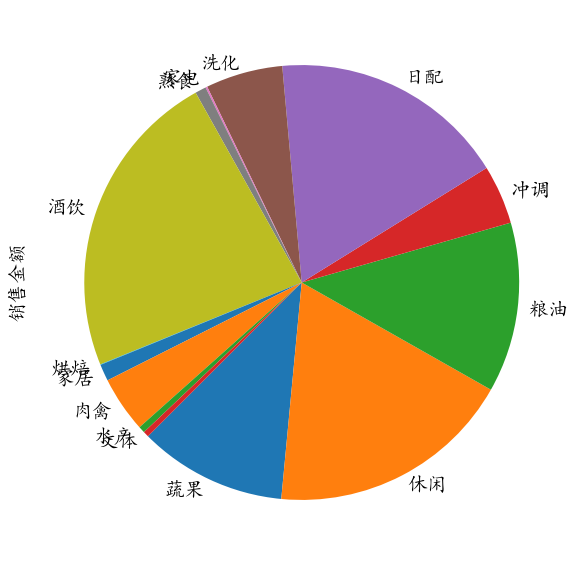

In [221]:
data_2_2_2 = data_2_2.loc[data_2_2['销售月份'] == 201502]
data_2_2_2 = data_2_2_2.drop(['销售月份'],axis=1)
data_02 = data_2_2_2['销售金额'].groupby(data_2_2_2['大类名称'])
data_02 = data_02.sum()
data_02 = data_02.take(sampler)
sampler= np.random.permutation(14)
plt.figure(figsize=(10,10))
data_02.plot.pie(labeldistance = 1.05,startangle=225)

## 3月份

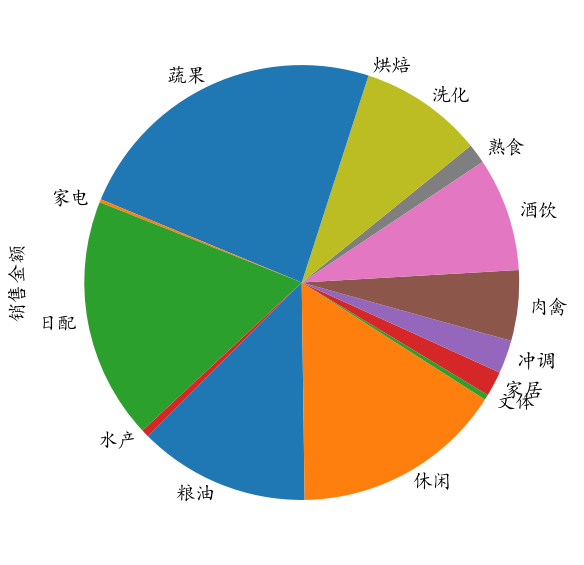

In [98]:
data_2_2_3 = data_2_2.loc[data_2_2['销售月份'] == 201503]
data_2_2_3 = data_2_2_3.drop(['销售月份'],axis=1)
data_03 = data_2_2_3['销售金额'].groupby(data_2_2_3['大类名称'])
data_03 = data_03.sum()
sampler= np.random.permutation(14)
data_03 = data_03.take(sampler)
plt.figure(figsize=(10,10))
data_03.plot.pie(labeldistance = 1.05,startangle=225)

## 4月份 

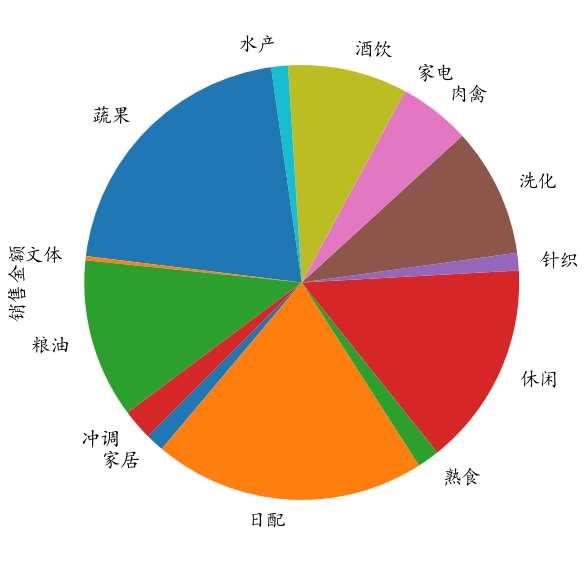

In [248]:
data_2_2_4 = data_2_2.loc[data_2_2['销售月份'] == 201504]
data_2_2_4 = data_2_2_4.drop(['销售月份'],axis=1)
data_04 = data_2_2_4['销售金额'].groupby(data_2_2_4['大类名称'])
data_04 = data_04.sum()
sampler= np.random.permutation(14)
data_04 = data_04.take(sampler)
plt.figure(figsize=(10,10))
data_04.plot.pie(labeldistance = 1.1,startangle=225)

# 2，1

In [510]:
data_0101 = data.loc[data['销售日期'] == 20150101]
data_0102 = data.loc[data['销售日期'] == 20150102] 
data_0103 = data.loc[data['销售日期'] == 20150103]
data_0104 = data.loc[data['销售日期'] == 20150104] 
data_0105 = data.loc[data['销售日期'] == 20150105]
data_0106 = data.loc[data['销售日期'] == 20150106] 
data_0107 = data.loc[data['销售日期'] == 20150107]
data_0108 = data.loc[data['销售日期'] == 20150108] 
data_0109 = data.loc[data['销售日期'] == 20150109]
data_0110 = data.loc[data['销售日期'] == 20150110] 
data_0111 = data.loc[data['销售日期'] == 20150111]
data_0112 = data.loc[data['销售日期'] == 20150112] 
data_0113 = data.loc[data['销售日期'] == 20150113]
data_0114 = data.loc[data['销售日期'] == 20150114] 
data_0115 = data.loc[data['销售日期'] == 20150115]
data_0116 = data.loc[data['销售日期'] == 20150116] 
data_0117 = data.loc[data['销售日期'] == 20150117]
data_0118 = data.loc[data['销售日期'] == 20150118] 
data_0119 = data.loc[data['销售日期'] == 20150119]
data_0120 = data.loc[data['销售日期'] == 20150120] 
data_0121 = data.loc[data['销售日期'] == 20150121]
data_0122 = data.loc[data['销售日期'] == 20150122] 
data_0123 = data.loc[data['销售日期'] == 20150123]
data_0124 = data.loc[data['销售日期'] == 20150124] 
data_0125 = data.loc[data['销售日期'] == 20150125]
data_0126 = data.loc[data['销售日期'] == 20150126] 
data_0127 = data.loc[data['销售日期'] == 20150127]
data_0128 = data.loc[data['销售日期'] == 20150128] 
data_0129 = data.loc[data['销售日期'] == 20150129]
data_0130 = data.loc[data['销售日期'] == 20150130] 
data_0131 = data.loc[data['销售日期'] == 20150131]
data_0201 = data.loc[data['销售日期'] == 20150201] 
data_0202 = data.loc[data['销售日期'] == 20150202]
data_0203 = data.loc[data['销售日期'] == 20150203] 
data_0204 = data.loc[data['销售日期'] == 20150204]
data_0205 = data.loc[data['销售日期'] == 20150205] 
data_0206 = data.loc[data['销售日期'] == 20150206]
data_0207 = data.loc[data['销售日期'] == 20150207] 
data_0208 = data.loc[data['销售日期'] == 20150208]
data_0209 = data.loc[data['销售日期'] == 20150209] 
data_0210 = data.loc[data['销售日期'] == 20150210]
data_0211 = data.loc[data['销售日期'] == 20150211] 
data_0212 = data.loc[data['销售日期'] == 20150212]
data_0213 = data.loc[data['销售日期'] == 20150213] 
data_0214 = data.loc[data['销售日期'] == 20150214]
data_0215 = data.loc[data['销售日期'] == 20150215] 
data_0216 = data.loc[data['销售日期'] == 20150216]
data_0217 = data.loc[data['销售日期'] == 20150217] 
data_0218 = data.loc[data['销售日期'] == 20150218]
data_0219 = data.loc[data['销售日期'] == 20150219] 
data_0220 = data.loc[data['销售日期'] == 20150220]
data_0221 = data.loc[data['销售日期'] == 20150221] 
data_0222 = data.loc[data['销售日期'] == 20150222]
data_0223 = data.loc[data['销售日期'] == 20150223] 
data_0224 = data.loc[data['销售日期'] == 20150224]
data_0225 = data.loc[data['销售日期'] == 20150225] 
data_0226 = data.loc[data['销售日期'] == 20150226]
data_0227 = data.loc[data['销售日期'] == 20150227] 
data_0228 = data.loc[data['销售日期'] == 20150228]
data_0229 = data.loc[data['销售日期'] == 20150229] 
data_0301 = data.loc[data['销售日期'] == 20150301]
data_0302 = data.loc[data['销售日期'] == 20150302] 
data_0303 = data.loc[data['销售日期'] == 20150303]
data_0304 = data.loc[data['销售日期'] == 20150304] 
data_0305 = data.loc[data['销售日期'] == 20150305]
data_0306 = data.loc[data['销售日期'] == 20150306] 
data_0307 = data.loc[data['销售日期'] == 20150307]
data_0308 = data.loc[data['销售日期'] == 20150308] 
data_0309 = data.loc[data['销售日期'] == 20150309]
data_0310 = data.loc[data['销售日期'] == 20150310] 
data_0311 = data.loc[data['销售日期'] == 20150311]
data_0312 = data.loc[data['销售日期'] == 20150312] 
data_0313 = data.loc[data['销售日期'] == 20150313]
data_0314 = data.loc[data['销售日期'] == 20150314] 
data_0315 = data.loc[data['销售日期'] == 20150315]
data_0316 = data.loc[data['销售日期'] == 20150316] 
data_0317 = data.loc[data['销售日期'] == 20150317]
data_0318 = data.loc[data['销售日期'] == 20150318] 
data_0319 = data.loc[data['销售日期'] == 20150319]
data_0320 = data.loc[data['销售日期'] == 20150320] 
data_0321 = data.loc[data['销售日期'] == 20150321]
data_0322 = data.loc[data['销售日期'] == 20150322] 
data_0323 = data.loc[data['销售日期'] == 20150323]
data_0324 = data.loc[data['销售日期'] == 20150324] 
data_0325 = data.loc[data['销售日期'] == 20150325]
data_0326 = data.loc[data['销售日期'] == 20150326] 
data_0327 = data.loc[data['销售日期'] == 20150327]
data_0328 = data.loc[data['销售日期'] == 20150328] 
data_0329 = data.loc[data['销售日期'] == 20150329]
data_0330 = data.loc[data['销售日期'] == 20150330] 
data_0331 = data.loc[data['销售日期'] == 20150331]
data_0401 = data.loc[data['销售日期'] == 20150401] 
data_0402 = data.loc[data['销售日期'] == 20150402]
data_0403 = data.loc[data['销售日期'] == 20150403] 
data_0404 = data.loc[data['销售日期'] == 20150404]
data_0405 = data.loc[data['销售日期'] == 20150405] 
data_0406 = data.loc[data['销售日期'] == 20150406]
data_0407 = data.loc[data['销售日期'] == 20150407] 
data_0408 = data.loc[data['销售日期'] == 20150408]
data_0409 = data.loc[data['销售日期'] == 20150409] 
data_0410 = data.loc[data['销售日期'] == 20150410]
data_0411 = data.loc[data['销售日期'] == 20150411] 
data_0412 = data.loc[data['销售日期'] == 20150412]
data_0413 = data.loc[data['销售日期'] == 20150413] 
data_0414 = data.loc[data['销售日期'] == 20150414]
data_0415 = data.loc[data['销售日期'] == 20150415] 
data_0416 = data.loc[data['销售日期'] == 20150416]
data_0417 = data.loc[data['销售日期'] == 20150417] 
data_0418 = data.loc[data['销售日期'] == 20150418]
data_0419 = data.loc[data['销售日期'] == 20150419] 
data_0420 = data.loc[data['销售日期'] == 20150420]
data_0421 = data.loc[data['销售日期'] == 20150421] 
data_0422 = data.loc[data['销售日期'] == 20150422]
data_0423 = data.loc[data['销售日期'] == 20150423] 
data_0424 = data.loc[data['销售日期'] == 20150424]
data_0425 = data.loc[data['销售日期'] == 20150425] 
data_0426 = data.loc[data['销售日期'] == 20150426]
data_0427 = data.loc[data['销售日期'] == 20150427] 
data_0428 = data.loc[data['销售日期'] == 20150428]
data_0429 = data.loc[data['销售日期'] == 20150429] 
data_0430 = data.loc[data['销售日期'] == 20150430]

In [516]:
data_week1 = pd.concat([data_0101,data_0102,data_0103,data_0104,data_0105,data_0106,data_0107],axis=0,ignore_index=True)
data_week1

,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,20150101,201501,DW-1201090311,,生鲜,个,8.000,4.00,2.00,否
1,1,20,粮油,2014,酱菜类,201401,榨菜,20150101,201501,DW-2014010019,60g,一般商品,袋,6.000,3.00,0.50,否
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020011,150g,一般商品,袋,1.000,2.40,2.40,否
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,20150101,201501,DW-1503050035,500g,一般商品,袋,1.000,6.50,8.30,否
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020020,100g*8,一般商品,袋,1.000,11.90,11.90,否
5,5,30,洗化,3018,卫生巾,301802,夜用卫生巾,20150101,201501,DW-3018020109,10片,一般商品,包,1.000,8.90,8.90,否
6,6,12,蔬果,1201,蔬菜,120104,花果,20150101,201501,DW-1201040022,散称,生鲜,千克,0.964,8.07,5.60,否
7,7,20,粮油,2001,袋装速食面,200101,牛肉口味,20150101,201501,DW-2001010062,120g,一般商品,袋,1.000,2.50,3.00,否
8,8,13,熟食,1308,现制中式面点,130803,现制烙类,20150101,201501,DW-1308030035,个,生鲜,个,2.000,2.00,1.00,否
9,9,22,休闲,2203,膨化点心,220302,袋装薯片,20150101,201501,DW-2203020029,45g,一般商品,袋,1.000,4.00,4.00,否


In [519]:
data_week2 = pd.concat([data_0108,data_0109,data_0110,data_0111,data_0112,data_0113,data_0114],axis=0,ignore_index=True)
data_week2.head()

,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
0,415,12,蔬果,1203,水果,120301,柑桔柚类,20150108,201501,DW-1203010290,散称,生鲜,KG,1.054,10.50,2.00,否
1,416,12,蔬果,1201,蔬菜,120105,鲜调味,20150108,201501,DW-1201050007,散称,生鲜,千克,0.132,2.06,15.60,否
2,129,12,蔬果,1201,蔬菜,120101,叶菜,20150108,201501,DW-1201010005,散称,生鲜,千克,0.246,1.43,5.80,否
3,326,22,休闲,2202,糕点,220202,蛋糕,20150108,201501,DW-2202020040,30g*4,一般商品,盒,1.000,8.30,8.30,否
4,416,12,蔬果,1203,水果,120313,其它水果,20150108,201501,DW-1203130332,散称,生鲜,KG,1.136,6.77,5.96,否


In [520]:
data_week3 = pd.concat([data_0115,data_0116,data_0117,data_0118,data_0119,data_0120,data_0121],axis=0,ignore_index=True)

In [521]:
data_week4 = pd.concat([data_0122,data_0123,data_0124,data_0125,data_0126,data_0127,data_0128],axis=0,ignore_index=True)

In [522]:
data_week5 = pd.concat([data_0129,data_0130,data_0131,data_0201,data_0202,data_0203,data_0204],axis=0,ignore_index=True)

In [524]:
data_week6 = pd.concat([data_0205,data_0206,data_0207,data_0208,data_0209,data_0210,data_0211],axis=0,ignore_index=True)

In [527]:
data_week7 = pd.concat([data_0212,data_0213,data_0214,data_0215,data_0216,data_0217,data_0218],axis=0,ignore_index=True)

In [528]:
data_week8 = pd.concat([data_0219,data_0220,data_0221,data_0222,data_0223,data_0224,data_0225],axis=0,ignore_index=True)

In [529]:
data_week9 = pd.concat([data_0226,data_0227,data_0228,data_0229,data_0301,data_0302,data_0303],axis=0,ignore_index=True)

In [530]:
data_week10 = pd.concat([data_0304,data_0305,data_0306,data_0307,data_0308,data_0309,data_0310],axis=0,ignore_index=True)

In [531]:
data_week11 = pd.concat([data_0311,data_0312,data_0313,data_0314,data_0315,data_0316,data_0317],axis=0,ignore_index=True)

In [532]:
data_week12 = pd.concat([data_0318,data_0319,data_0320,data_0321,data_0322,data_0323,data_0324],axis=0,ignore_index=True)

In [533]:
data_week13 = pd.concat([data_0325,data_0326,data_0327,data_0328,data_0329,data_0330,data_0331],axis=0,ignore_index=True)

In [534]:
data_week14 = pd.concat([data_0401,data_0402,data_0403,data_0404,data_0405,data_0406,data_0407],axis=0,ignore_index=True)

In [535]:
data_week15 = pd.concat([data_0408,data_0409,data_0410,data_0411,data_0412,data_0413,data_0414],axis=0,ignore_index=True)

In [536]:
data_week16 = pd.concat([data_0415,data_0416,data_0417,data_0418,data_0419,data_0420,data_0421],axis=0,ignore_index=True)

In [575]:
data_week17 = pd.concat([data_0422,data_0423,data_0424,data_0425,data_0426,data_0427,data_0428],axis=0,ignore_index=True)

In [633]:
data_week18 = pd.concat([data_0429,data_0430],axis=0,ignore_index=True)

In [690]:
data_week1_cx = data_week1.loc[data_week1['是否促销']=='是']
data_week1_wcx = data_week1.loc[data_week1['是否促销']=='否']

In [691]:
data_week1_cx = data_week1_cx['销售金额']

In [692]:
data_week1_wcx = data_week1_wcx['销售金额']

In [693]:
data_week1_cx = pd.DataFrame(data_week1_cx)
data_week1_wcx = pd.DataFrame(data_week1_wcx)
data_week1_cx.rename(columns={'销售金额':'第一周'},inplace=True)

In [694]:
data_week1_cx.head()

,第一周
18,79.00
19,2.70
22,33.90
27,8.28
34,10.90


In [673]:
data_week2_cx = data_week2.loc[data_week2['是否促销']=='是']
data_week2_wcx = data_week2.loc[data_week2['是否促销']=='否']

In [674]:
data_week2_cx = data_week2_cx['销售金额']
data_week2_wcx = data_week2_wcx['销售金额']
data_week2_cx = pd.DataFrame(data_week2_cx)
data_week2_wcx = pd.DataFrame(data_week2_wcx)
data_week2_cx.rename(columns={'销售金额':'第二周'},inplace=True)
data_week2_cx

,第二周
9,18.95
30,9.90
32,58.80
36,8.90
48,2.95
69,39.90
83,58.80
89,6.00
94,10.90
98,14.90


In [662]:
data_week3_cx = data_week3.loc[data_week3['是否促销']=='是']
data_week3_wcx = data_week3.loc[data_week3['是否促销']=='否']
data_week3_cx = data_week3_cx['销售金额']
data_week3_wcx = data_week3_wcx['销售金额']
data_week3_cx = pd.DataFrame(data_week3_cx)
data_week3_wcx = pd.DataFrame(data_week3_wcx)
data_week3_cx.rename(columns={'销售金额':'第三周'},inplace=True)

In [663]:
data_week4_cx = data_week4.loc[data_week4['是否促销']=='是']
data_week4_wcx = data_week4.loc[data_week4['是否促销']=='否']
data_week4_cx = data_week4_cx['销售金额']
data_week4_wcx = data_week4_wcx['销售金额']
data_week4_cx = pd.DataFrame(data_week4_cx)
data_week4_wcx = pd.DataFrame(data_week4_wcx)
data_week4_cx.rename(columns={'销售金额':'第四周'},inplace=True)

In [664]:
data_week5_cx = data_week5.loc[data_week5['是否促销']=='是']
data_week5_wcx = data_week5.loc[data_week5['是否促销']=='否']
data_week5_cx = data_week5_cx['销售金额']
data_week5_wcx = data_week5_wcx['销售金额']
data_week5_cx = pd.DataFrame(data_week4_cx)
data_week5_wcx = pd.DataFrame(data_week5_wcx)
data_week5_cx.rename(columns={'销售金额':'第五周'},inplace=True)

In [665]:
data_week6_cx = data_week6.loc[data_week6['是否促销']=='是']
data_week6_wcx = data_week6.loc[data_week6['是否促销']=='否']
data_week6_cx = data_week6_cx['销售金额']
data_week6_wcx = data_week6_wcx['销售金额']
data_week6_cx = pd.DataFrame(data_week6_cx)
data_week6_wcx = pd.DataFrame(data_week6_wcx)
data_week6_cx.rename(columns={'销售金额':'第六周'},inplace=True)

In [699]:
data_cx = pd.concat([data_week1_cx,data_week2_cx],axis=1,ignore_index=True)
data_cx

,0,1
9,NaN,18.95
18,79.00,NaN
19,2.70,NaN
22,33.90,NaN
27,8.28,NaN
30,NaN,9.90
32,NaN,58.80
34,10.90,NaN
36,NaN,8.90
42,7.50,NaN
